# No-Show Appointments Data Analysis

## Table of Contents<a href="#Table-of-Contents" class="anchor-link">¶</a>

-   [Introduction](#intro)
-   [Data Wrangling](#wrangling)
-   [Exploratory Data Analysis](#eda)
-   [Conclusions](#conclusions)

<span id="intro"></span>

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

In this project, We will be analyzing No-show Appointments dataset. Our
main goal is to explore the reasons for missed medical appointments This
dataset collects information from 100k medical appointments in Brazil
and is focused on the question of whether or not patients show up for
their appointment. A number ofcharacteristics about the patient are
included in each row.

-   'ScheduledDay' tells us on what day the patient set up their
    appointment.
-   'Neighborhood' indicates the location of the hospital.
-   'Scholarship' indicates whether or not the patient is enrolled in
    Brasilian welfare program.
-   'No show' says ‘No’ if the patient showed up to their appointment,
    and ‘Yes’ if they didn't show
-   'Hipertension' indicates whether the patient have hipertension or
    not
-   'Diabetes' indicates whether the patientt have diabetes or not
-   'Handcap' represents the number of disabilities a person have
-   'SMS-received' tell us whether the patient received an SMS message

## Questions we are trying to explore:<a href="#Questions-we-are-trying-to-explore:" class="anchor-link">¶</a>

1.  Is there a relation between missing the appointment and disability?
2.  Also is there a relation between having hipertension or diabetes and
    missing the appointment?
3.  Do people have the problem of alcoholism are more likely to miss
    their medical appointments?
4.  Are patients who didn't receive SMS message are more likely to miss
    their medical appointments?
5.  Is the number of Waiting Days affect the probability of misssing the
    appointment?

In \[57\]:

    # Let's import necessary libraries for our analysis
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

<span id="wrangling"></span>

## Data Wrangling<a href="#Data-Wrangling" class="anchor-link">¶</a>

### General Properties<a href="#General-Properties" class="anchor-link">¶</a>

In \[58\]:

    # Load our data and just have a closer look! 
    appointments_data = pd.read_csv('KaggleV2-May-2016.csv')
    appointments_data.head()

Out\[58\]:

|     | PatientId    | AppointmentID | Gender | ScheduledDay         | AppointmentDay       | Age | Neighbourhood     | Scholarship | Hipertension | Diabetes | Alcoholism | Handcap | SMS_received | No-show |
|-----|--------------|---------------|--------|----------------------|----------------------|-----|-------------------|-------------|--------------|----------|------------|---------|--------------|---------|
| 0   | 2.990000e+13 | 5642903       | F      | 2016-04-29T18:38:08Z | 2016-04-29T00:00:00Z | 62  | JARDIM DA PENHA   | 0           | 1            | 0        | 0          | 0       | 0            | No      |
| 1   | 5.590000e+14 | 5642503       | M      | 2016-04-29T16:08:27Z | 2016-04-29T00:00:00Z | 56  | JARDIM DA PENHA   | 0           | 0            | 0        | 0          | 0       | 0            | No      |
| 2   | 4.260000e+12 | 5642549       | F      | 2016-04-29T16:19:04Z | 2016-04-29T00:00:00Z | 62  | MATA DA PRAIA     | 0           | 0            | 0        | 0          | 0       | 0            | No      |
| 3   | 8.680000e+11 | 5642828       | F      | 2016-04-29T17:29:31Z | 2016-04-29T00:00:00Z | 8   | PONTAL DE CAMBURI | 0           | 0            | 0        | 0          | 0       | 0            | No      |
| 4   | 8.840000e+12 | 5642494       | F      | 2016-04-29T16:07:23Z | 2016-04-29T00:00:00Z | 56  | JARDIM DA PENHA   | 0           | 1            | 1        | 0          | 0       | 0            | No      |

In \[59\]:

    # Assessing Data
    # Perform operations to inspect datatypes and look for instances of missing or possibly errant data.
    appointments_data.shape

Out\[59\]:

    (110527, 14)

Here, we have 110527 records with 14 features

In \[60\]:

    appointments_data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 110527 entries, 0 to 110526
    Data columns (total 14 columns):
     #   Column          Non-Null Count   Dtype  
    ---  ------          --------------   -----  
     0   PatientId       110527 non-null  float64
     1   AppointmentID   110527 non-null  int64  
     2   Gender          110527 non-null  object 
     3   ScheduledDay    110527 non-null  object 
     4   AppointmentDay  110527 non-null  object 
     5   Age             110527 non-null  int64  
     6   Neighbourhood   110527 non-null  object 
     7   Scholarship     110527 non-null  int64  
     8   Hipertension    110527 non-null  int64  
     9   Diabetes        110527 non-null  int64  
     10  Alcoholism      110527 non-null  int64  
     11  Handcap         110527 non-null  int64  
     12  SMS_received    110527 non-null  int64  
     13  No-show         110527 non-null  object 
    dtypes: float64(1), int64(8), object(5)
    memory usage: 11.8+ MB

In \[61\]:

    appointments_data.duplicated().sum()

Out\[61\]:

    0

In \[62\]:

    appointments_data.duplicated(['PatientId']).sum()

Out\[62\]:

    104427

Inspecting the data, we found no null values or duplicates which sounds
nice, but there are many duplicate rows for patient id which may affect
our analysis if some patients had bad records (i.e. most often miss
their appointments). Also we have to change the datatypes for
\[ScheduledDay, AppointmentDay\] columns to make our analysis easier.

In \[63\]:

    appointments_data.describe()

Out\[63\]:

|       | PatientId    | AppointmentID | Age           | Scholarship   | Hipertension  | Diabetes      | Alcoholism    | Handcap       | SMS_received  |
|-------|--------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|
| count | 1.105270e+05 | 1.105270e+05  | 110527.000000 | 110527.000000 | 110527.000000 | 110527.000000 | 110527.000000 | 110527.000000 | 110527.000000 |
| mean  | 1.474961e+14 | 5.675305e+06  | 37.088874     | 0.098266      | 0.197246      | 0.071865      | 0.030400      | 0.022248      | 0.321026      |
| std   | 2.560943e+14 | 7.129575e+04  | 23.110205     | 0.297675      | 0.397921      | 0.258265      | 0.171686      | 0.161543      | 0.466873      |
| min   | 3.920000e+04 | 5.030230e+06  | -1.000000     | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      |
| 25%   | 4.170000e+12 | 5.640286e+06  | 18.000000     | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      |
| 50%   | 3.170000e+13 | 5.680573e+06  | 37.000000     | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      |
| 75%   | 9.440000e+13 | 5.725524e+06  | 55.000000     | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 1.000000      |
| max   | 1.000000e+15 | 5.790484e+06  | 115.000000    | 1.000000      | 1.000000      | 1.000000      | 1.000000      | 4.000000      | 1.000000      |

Trying to understand the structure of our data and estimate its quality
There is a lot to tell:

-   First, the age column seems to have inaccurate values (i.e. -1), so
    let's explore more in the next cell!
-   It seems clearly that most of the patients aren't enrolled in
    Brasilian welfare program.
-   There is about 75% of patients don't have neither Hipertension nor
    Diabetes.
-   There is about 75% of patients aren't alcoholic.
-   There is about 75% of patients don't have disabilities.
-   There is around 50% of patients don't receive SMS. And for all of
    the above we will explore more in a bit!

In \[64\]:

    appointments_data.Age.value_counts()

Out\[64\]:

     0      3539
     1      2273
     52     1746
     49     1652
     53     1651
            ... 
     115       5
     100       4
     102       2
     99        1
    -1         1
    Name: Age, Length: 104, dtype: int64

In \[65\]:

    appointments_data.Age.unique()

Out\[65\]:

    array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
            15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
            79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
             6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
            35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
            24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
            14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
            86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
          dtype=int64)

There is one inaccurate value for Age corresponding to one row, so I
will drop it.

Let's explore the time frame this data was taked

In \[66\]:

    appointments_data.ScheduledDay.max()

Out\[66\]:

    '2016-06-08T20:07:23Z'

In \[67\]:

    appointments_data.ScheduledDay.min()

Out\[67\]:

    '2015-11-10T07:13:56Z'

In \[68\]:

    appointments_data.AppointmentDay.max()

Out\[68\]:

    '2016-06-08T00:00:00Z'

In \[69\]:

    appointments_data.AppointmentDay.min()

Out\[69\]:

    '2016-04-29T00:00:00Z'

To ensure quality of our dataset , let's check unique values for some
columns.

In \[70\]:

    appointments_data.Gender.unique()

Out\[70\]:

    array(['F', 'M'], dtype=object)

In \[71\]:

    appointments_data.Scholarship.unique()

Out\[71\]:

    array([0, 1], dtype=int64)

In \[72\]:

    appointments_data.Hipertension.unique()

Out\[72\]:

    array([1, 0], dtype=int64)

In \[73\]:

    appointments_data.Diabetes.unique()

Out\[73\]:

    array([0, 1], dtype=int64)

In \[74\]:

    appointments_data.Alcoholism.unique()

Out\[74\]:

    array([0, 1], dtype=int64)

In \[75\]:

    appointments_data.Handcap.unique()

Out\[75\]:

    array([0, 1, 2, 3, 4], dtype=int64)

In \[76\]:

    appointments_data.SMS_received.unique()

Out\[76\]:

    array([0, 1], dtype=int64)

In \[77\]:

    appointments_data['No-show'].unique()

Out\[77\]:

    array(['No', 'Yes'], dtype=object)

ScheduledDay column range is between '2015-11-10T07:13:56Z' and
'2016-06-08T20:07:23Z'. AppointmentDay column range is between
'2016-04-29T00:00:00Z' and '2016-06-08T00:00:00Z'.

### Problems to deal with in cleaning section<a href="#Problems-to-deal-with-in-cleaning-section"
class="anchor-link">¶</a>

1.  clean some column labels such as Hypertension and Handicap from
    spelling mistakes.
2.  No-show column is way confusing, so we will be working on clarifying
    it in the next section.
3.  Inaccurate data in Age column (i.e. negative value as mentioned
    above)

### Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>

In \[78\]:

    # clean column labels and clarify no-show column
    appointments_data.rename(columns={'No-show':'show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
    appointments_data['show'].replace({'Yes': 0, 'No': 1}, inplace=True)

In \[79\]:

    appointments_data.head(1)

Out\[79\]:

|     | PatientId    | AppointmentID | Gender | ScheduledDay         | AppointmentDay       | Age | Neighbourhood   | Scholarship | Hypertension | Diabetes | Alcoholism | Handicap | SMS_received | show |
|-----|--------------|---------------|--------|----------------------|----------------------|-----|-----------------|-------------|--------------|----------|------------|----------|--------------|------|
| 0   | 2.990000e+13 | 5642903       | F      | 2016-04-29T18:38:08Z | 2016-04-29T00:00:00Z | 62  | JARDIM DA PENHA | 0           | 1            | 0        | 0          | 0        | 0            | 1    |

In \[80\]:

    #get row index where Age = -1
    to_drop = appointments_data[appointments_data['Age'] == -1].index

In \[81\]:

    # drop this row
    appointments_data.drop(to_drop, inplace=True)

In \[82\]:

    appointments_data.Age.unique()

Out\[82\]:

    array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
            15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
            79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
             6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
            35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
            24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
            14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
            86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
          dtype=int64)

Now, We have accurate Data in Age column

Now, we are ready to explore....

<span id="eda"></span>

## Exploratory Data Analysis<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

In \[83\]:

    appointments_data.hist(color='pink', figsize=(10,10));

![](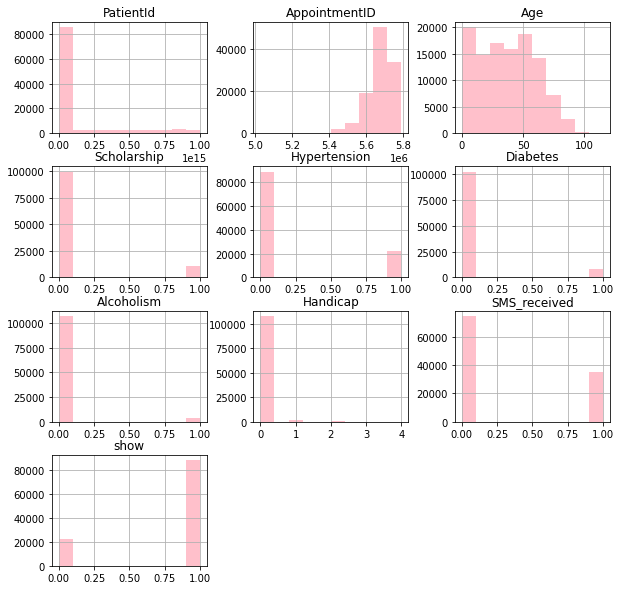%0A)

Here we have a lot of variables which have two values and it seems
clear:

1.  patients who have scholarships are way too small than patients who
    didn't
2.  patients who have hypertension, diabetes are too less than patients
    who didn't.
3.  Also alcoholic seems too small compared to non-alcoholic patients.
4.  there are patients who have more than one disability, but majority
    of them didn't have.
5.  people receive SMS are too small compared to others.
6.  there is around 25%patients who miss their appointments.
7.  Many patients are infants and young children.

### Q1: Is there a relation between missing the appointment and disability?<a
href="#Q1:-Is-there-a-relation-between-missing-the-appointment-and-disability?"
class="anchor-link">¶</a>

In \[84\]:

    def bar_chart(column):
        # let's count each cateogary of specified column for people who miss their appointments
        miss_counts = appointments_data.query('show == 0').groupby(column).count()['Age']
        # Let's count each cateogary of specified column regardless of show column
        appointments_counts = appointments_data.groupby(column).count()['Age']
        # Let's do a little check
        appointments_data.shape[0] == appointments_counts[0] + appointments_counts[1]
        # Here, we are trying to get percentage of people who miss their appointments by each category of specified column
        miss_proportions = miss_counts / appointments_counts
        if column != 'Handicap':
            plt.bar([1, 3], miss_proportions, tick_label=[0, 1])
        else:
            plt.bar([0, 1, 2, 3, 4], miss_proportions, tick_label=[0, 1, 2, 3, 4])
            
        plt.title(f'Miss Proportions By {column}')
        plt.xlabel(column)
        plt.ylabel('Miss Proportion');
        

In \[85\]:

    bar_chart('Handicap')

![](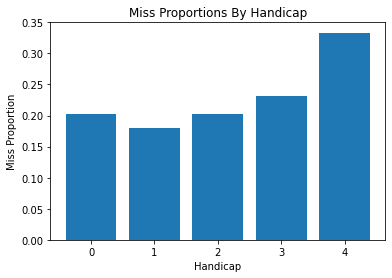%0A)

It seems clear that people who have four disabilities are more likely to
miss their medical appointments and the other percentages seems close to
each other, but it could be because people who have four disabilities
are way too small.

### Q2: Is there a relation between having hipertension or diabetes and missing the appointment?<a
href="#Q2:-Is-there-a-relation-between-having-hipertension-or-diabetes-and-missing-the-appointment?"
class="anchor-link">¶</a>

In \[86\]:

    bar_chart('Hypertension')

![](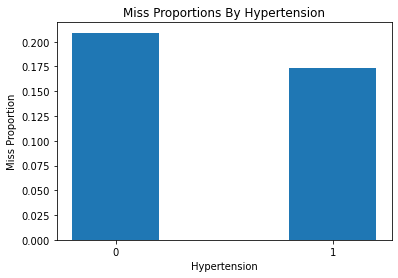%0A)

It seems clearly that people who didn't have Hypertension are more
likely to miss their medical appointments.

In \[87\]:

    bar_chart('Diabetes')

![](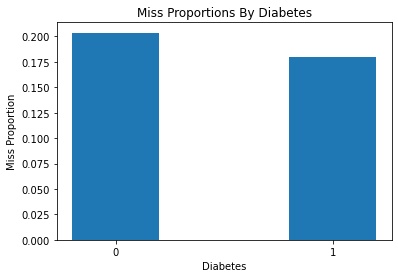%0A)

And it's clear also that people who don't have diabetes are more likely
to miss their appointments. continuing to explore....

### Q3: Do people have the problem of alcoholism are more likely to miss their medical appointments?<a
href="#Q3:-Do-people-have-the-problem-of-alcoholism-are-more-likely-to-miss-their-medical---------------------appointments?"
class="anchor-link">¶</a>

In \[88\]:

    # let's call our custom function
    bar_chart('Alcoholism')

![](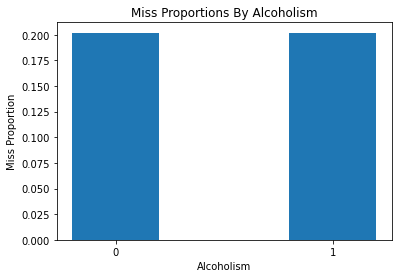%0A)

There is nearly same percentage of missing the appointments between
alcoholic and non_alcoholic people.

### Q4: Are patients who didn't receive SMS message are more likely to miss their medical appointments?<a
href="#Q4:--Are-patients-who-didn&#39;t-receive-SMS-message-are-more-likely-to-miss-their-medical----------------appointments?"
class="anchor-link">¶</a>

In \[89\]:

    bar_chart('SMS_received')

![](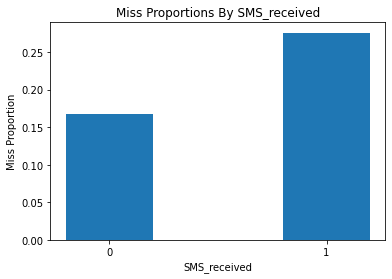%0A)

It seems surpriseingly that people who received SMS are more likely by
about 10% to miss their appointments!

<span id="conclusions"></span>

## Conclusions<a href="#Conclusions" class="anchor-link">¶</a>

After our journey of Analysis, We can tell our findings:

1.  First, people who have four disabilities are more likely to miss
    their medical appointments and the other percentages seems close to
    each other, but it could be because people who have four
    disabilities are way too small.
2.  People who didn't have Hypertension are more likely to miss their
    medical appointments.
3.  There is nearly same percentage of missing the appointments between
    alcoholic and non_alcoholic patients.
4.  People who don't have diabetes are more likely to miss their
    appointments
5.  It seems unexpectedly that people who received SMS are more likely
    by about 10% to miss their appointments! All We found is restricted
    with some limitations: \### Limitations
## Limitations
1.  This Dataset is way too small to find accurate or useful patterns.
    Also it has a small time frame which make it difficult to conclude
    useful insights since ScheduledDay column range is between
    '2015-11-10T07:13:56Z' and '2016-06-08T20:07:23Z' and AppointmentDay
    column range is between '2016-04-29T00:00:00Z' and
    '2016-06-08T00:00:00Z'.
2.  Also if some patients had bad records (i.e. most often miss their
    appointments) which is fact here, we need to do further analysis for
    those patients.
3.  We dropped one row containing inaccurate value of age.

